# Titanic Prediction Notebook - Daniel

### Plan

Within this notebook, I'm going to follow the plan below:

1. Exploratory Data Analysis
    - Feature Engineering
2. Check for Missing values
3. Rescale Data
4. Make predictions with some models

In [44]:
# Imports
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # plotting
import seaborn as sns

# Pre processing
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [45]:
# Read in data
training = pd.read_csv("/Users/Bozinovski/Desktop/Home/Kaggle/Titanic/train.csv")
testing = pd.read_csv("/Users/Bozinovski/Desktop/Home/Kaggle/Titanic/test.csv")

In [46]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
print(training.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


# Data Descriptions
<b>Survival:</b> 0 = No, 1 = Yes

<b>pclass(Ticket class):</b> 1=1st, 2=2nd, 3=3rd

<b>sex:</b> Sex

<b>Age:</b> Age in years

<b>sibsp:</b> number of siblings/spouses aboard the Titanic

<b>parch:</b> number of parents/children aboard the Titanic

<b>ticket:</b> Ticket number

<b>fare:</b> Passenger fare

<b>cabin:</b> Cabin number

<b>embarked:</b> Port of Embarkation, C=Cherbourg, Q=Queenstown, S=Southampton

### Which Features are categorical?

Categorical: Survived, Pclass, Sex, Embarked
Continous: Age, Sibsp, Parch, Fare

In [48]:
# Data types
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


It seems that we have missing data for Age, Cabin and Embarked.

Missing: Cabin > Age > Embarked

We're going to have to find a way to deal with this missing data.

In [49]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Missing Values

# Feature Engineering

We now need to decide what features we are going to keep and which ones we are going to get rid of

In [50]:
# Create our 2 bins, one for continous variables and the other for discrete
df_binary = pd.DataFrame() # for discretised continuous variables
df_continuous = pd.DataFrame() # for continuous variables 

# Feature 1: Survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

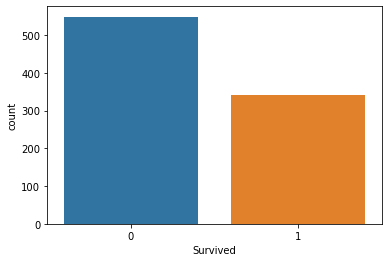

In [51]:
# How many people survived/died?
training['Survived'].value_counts()
sns.countplot(x="Survived", data=training)

In [52]:
# Add the data to our subsets
df_binary['Survived'] = training['Survived']
df_continuous['Survived'] = training['Survived']

# Feature 2: Pclass

So we know that Pclass relates to the class that each person was in

1 implied 1st class
2 implied 2nd class
3 implied 3rd class

In [53]:
training['Pclass'].head()

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

In [54]:
training['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

/Users/Bozinovski/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pclass', ylabel='Density'>

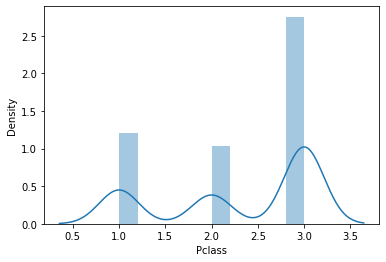

In [55]:
sns.distplot(training['Pclass'])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

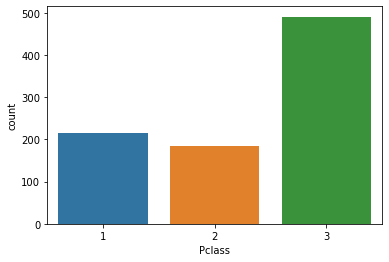

In [56]:
sns.countplot(x="Pclass", data=training)

We note that the number of people that a large portion of the people were in 3rd class.

Since there seems to be a correlation with people being in a specific Pclass and their survival rate, we will add it to our sub data frames.

In [38]:
df_binary['Pclass'] = training['Pclass']
df_continuous['Pclass'] = training['Pclass']

df_binary.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


# Feature 3: Sex (Categorical)

In [62]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
# Check how many males vs females
totalM, totalF = training['Sex'].value_counts()
print(f"Total Males: {totalM}")
print(f"Total Females: {totalF}")

Total Males: 577
Total Females: 314


<AxesSubplot:xlabel='count', ylabel='Sex'>

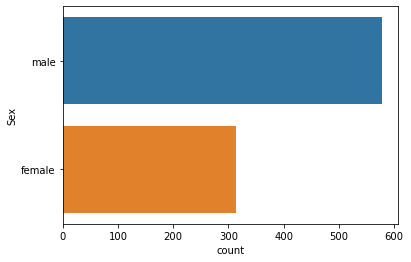

In [74]:
# Graph of above
sns.countplot(y = "Sex", data = training)

In [75]:
# Are there any missing values for sex?
training.Sex.isnull().sum()

0

In [78]:
# How many of each sex survived?
sex = training['Sex']
survived = training['Survived']

maleSurvived = 0
femaleSurvived = 0

for i in range(len(sex)):
    
    if sex[i] == "female":
        femaleSurvived += survived[i]
    else:
        maleSurvived += survived[i]
        
print(f"Females Survived: {femaleSurvived}/{totalF} ({round(femaleSurvived/totalF * 100)}%)")
print(f"Males Survived: {maleSurvived}/{totalM} ({round(femaleSurvived/totalF * 100)}%)")

Females Survived: 233/314 (74%)
Males Survived: 109/577 ()


# Cabin

In [29]:
training['Cabin'].value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
C22 C26        3
F33            3
              ..
A7             1
A19            1
F38            1
C87            1
B19            1
Name: Cabin, Length: 147, dtype: int64

Doesn't seem to have any type of correlation and since there are so many missing values / null values, we are not going to use Cabin as one of our features.

This may change on a future update

In [30]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Sex